# Poduct Sales Data Analysis 

The aim of the project is to conduct exploratory data analysis on the sales of products of a perticular store, througout the year 2019. Data sets are available seperately for each month. 

data set obtained form : https://www.kaggle.com/knightbearr/sales-product-data

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

import matplotlib.pyplot as plt
%matplotlib inline


#### Data reading and wrangling

In [2]:
months = ["January","February","March","April","May","June","July","August","September","October","November","December"]
header = ['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address']
dfs=[]

In [3]:
for i in months:
    temp = pd.read_csv('Sales_{}_2019.csv'.format(i), index_col = None, header = None, skiprows =1 )
    dfs.append(temp)
df = pd.concat(dfs, axis=0, ignore_index=True)
df.dropna(inplace =True)
df.columns= header
df.drop(df.loc[df['Order ID'] =='Order ID'].index.tolist(), axis=0,inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [5]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

Convering the data types and creating new columns to analyze data

In [6]:
from datetime import datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Purchase Address'] = df['Purchase Address'].astype(str)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

In [7]:
df['City'] = df['Purchase Address'].str.split(',').str[1].astype(str)

In [8]:
df['Total Price'] = df['Quantity Ordered']* df['Price Each']

In [9]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Total Price
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,11.99


### Analyze the sales based on products

In [10]:
items = df.groupby('Product').agg({'Quantity Ordered' : 'sum', 'Price Each' : 'mean', 'Total Price' : 'sum'})
items

,Quantity Ordered,Price Each,Total Price
Product,,,
20in Monitor,4129,109.99,454148.71
27in 4K Gaming Monitor,6244,389.99,2435097.56
27in FHD Monitor,7550,149.99,1132424.50
34in Ultrawide Monitor,6199,379.99,2355558.01
AA Batteries (4-pack),27635,3.84,106118.40
AAA Batteries (4-pack),31017,2.99,92740.83
Apple Airpods Headphones,15661,150.00,2349150.00
Bose SoundSport Headphones,13457,99.99,1345565.43
Flatscreen TV,4819,300.00,1445700.00


#### Analysis based on quantity of items sold

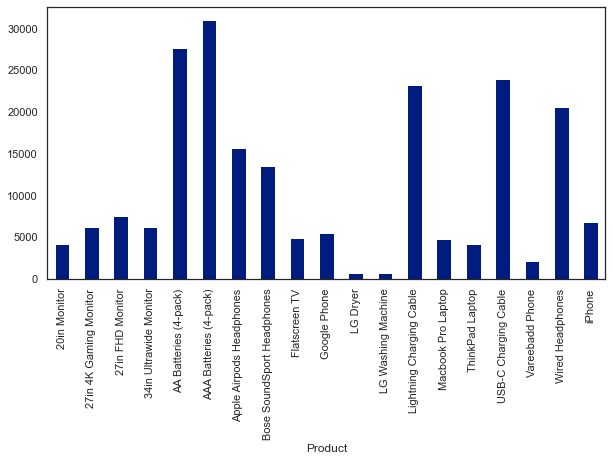

In [11]:
ax = items['Quantity Ordered'].plot.bar(figsize = (10,5))


It can be seen that the most amount of sales are for batteries (AAA and AA) followed by Charging cables (USB-C and Lighting Cables). Least amount of sales are for LG washing machines and LG Dryers

#### Analysis of sales based on the revenue

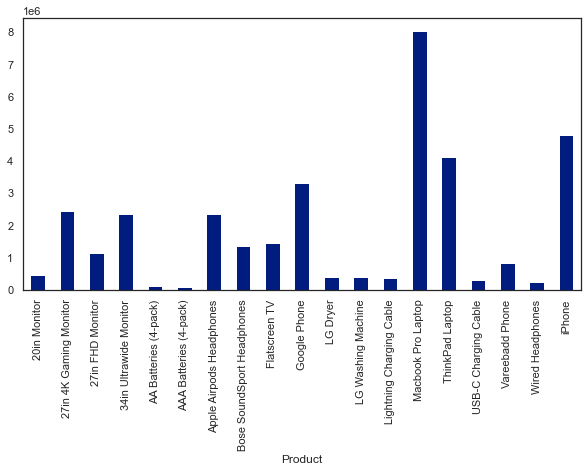

In [12]:
ax = items['Total Price'].plot.bar(figsize = (10,5))


The highest sales are for Macbook Pro Laptop, followed by iPhones. ThinkPad Laptops has third highest sales, followd by Google Phones. 

### Analysing the sales by the month

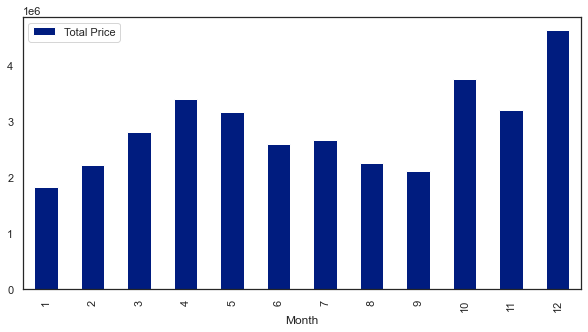

In [13]:
df['Month'] = df['Order Date'].dt.month
monthlySales = df.groupby('Month').agg({'Total Price' : 'sum'})
monthlySales.plot.bar(figsize=(10,5))


It can be seen that most of the sales are concentrated towards the end of the year. 

In [14]:
itemsMonthly = df.groupby(['Product','Month']).agg({'Quantity Ordered' : 'sum', 'Total Price':'sum'}).reset_index()
itemsMonthly

,Product,Month,Quantity Ordered,Total Price
0,20in Monitor,1,218,23977.82
1,20in Monitor,2,246,27057.54
2,20in Monitor,3,326,35856.74
3,20in Monitor,4,393,43226.07
4,20in Monitor,5,341,37506.59
...,...,...,...,...
223,iPhone,8,439,307300.00
224,iPhone,9,397,277900.00
225,iPhone,10,716,501200.00
226,iPhone,11,665,465500.00


#### Analyze the sale of MacBook Pro Laptops throughout the months 

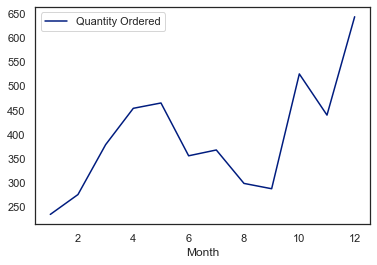

In [15]:
itemsMonthly.loc[itemsMonthly['Product'] == 'Macbook Pro Laptop'].plot(x='Month',y='Quantity Ordered')

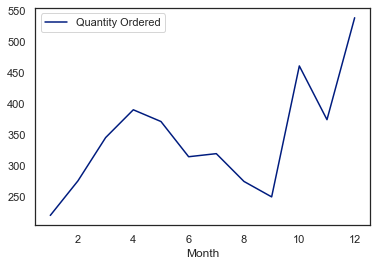

In [16]:
itemsMonthly.loc[itemsMonthly['Product'] == 'ThinkPad Laptop'].plot(x='Month',y='Quantity Ordered')

Based on the analysis, both laptop sales are higher around the end of the year. Let's see now how the sale of batteries are throughout the months

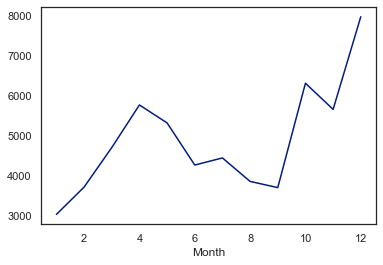

In [17]:
itemsMonthly.loc[itemsMonthly['Product'].str.contains('Batteries')].groupby('Month').sum()['Quantity Ordered'].plot()

#### Analyze the sales pattern of  the items least sold

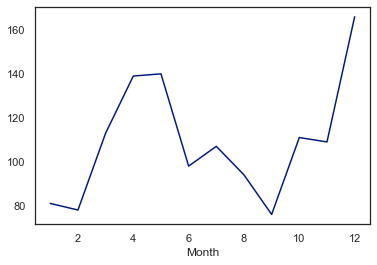

In [18]:
itemsMonthly.loc[itemsMonthly['Product'].str.contains('LG')].groupby('Month').sum()['Quantity Ordered'].plot()

#### Comparison of sales of all prodcuts based on month of sale

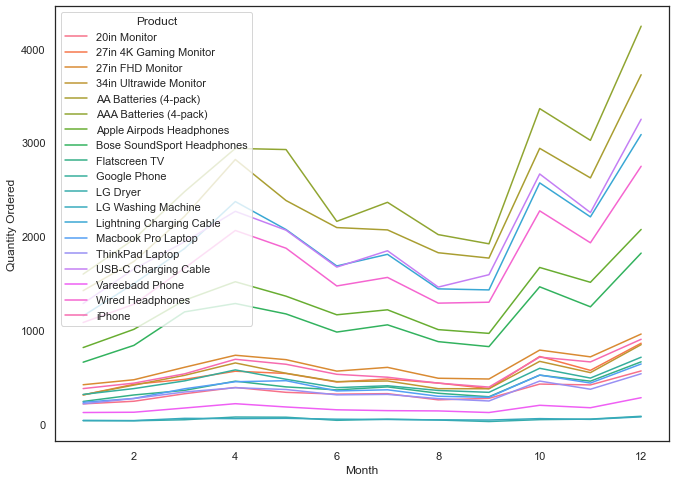

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11,8)
sns.lineplot(data = itemsMonthly, x='Month',y='Quantity Ordered', hue='Product',ax=ax)

It seems almost all the prodcuts follow the same sales pattern throughout the months

### Sale analysis based on location

In [20]:
citySales = df.groupby(['City']).agg({'Quantity Ordered' : 'sum',  'Total Price' : 'sum'}).reset_index()
citySales.dtypes

City                 object
Quantity Ordered      int32
Total Price         float64
dtype: object

#### Visualizing the sales by location

In [21]:
import folium
from folium import plugins
from folium.plugins import HeatMap
import ipywidgets
#from ipyleaflet import Map, Marker, MarkerCluster, Heatmap
import geocoder
import geopy


mp = folium.Map(location=[41,-99], zoom_start=3.5)

loc =[]

citylist = df.City.unique().tolist()
for i in citylist:
    geo = geocoder.arcgis(i)
    val = citySales.loc[citySales['City'] ==i]['Total Price'].item()
    loc.append([geo.lat, geo.lng,val ])
    folium.Marker([geo.lat,geo.lng],
                  opacity=0,
                  tooltip = ('<body>City: {} <br> Sales: {}M</body>'.format(i, round(val/1000000,3)))).add_to(mp)
    
HeatMap(loc).add_to(mp)
folium.LayerControl().add_to(mp)


mp

From the data, it can be seen that most sales have occured in San Francisco area.

### Analysis of the orders placed

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CE58530FC8>]],
      dtype=object)

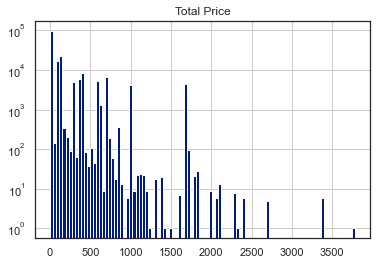

In [22]:
orders = df.groupby(['Order ID']).agg({'Total Price':'sum'}).sort_values('Total Price').reset_index()
orders.hist(bins=100, log=True)

In [23]:
orders['Total Price'].describe()

count    178437.000000
mean        193.300918
std         341.274261
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3779.990000
Name: Total Price, dtype: float64

from these statistics, it can be seen that most of the orders placed are of lower value, where as there are only few orders with a high value.